<a href="https://colab.research.google.com/github/KazDev17/Anime-Success-Predictor/blob/main/Anime_Success_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mal_anime.csv')

# Look at the first 5 rows to make sure it's working
df.head()

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [2]:
# --- PHASE 1: LOADING & INITIAL INSPECTION ---

import pandas as pd # 'pd' is the standard nickname for the Pandas library

# 1. Load the data into a 'DataFrame' (think of this as a Python-powered Excel sheet)
# Replace 'mal_anime.csv' with the exact name of the file you uploaded
df = pd.read_csv('mal_anime.csv')

# 2. Let's see how many rows (anime) and columns (stats) we have
print(f"The dataset has {df.shape[0]} anime entries and {df.shape[1]} features.")

# 3. List the columns so we know what we can use for our 'Success Predictor'
print("\nAvailable stats for each anime:")
print(df.columns.tolist())

# 4. Look at the first 5 rows to see what the data actually looks like
df.head()

The dataset has 19931 anime entries and 25 features.

Available stats for each anime:
['myanimelist_id', 'title', 'description', 'image', 'Type', 'Episodes', 'Status', 'Premiered', 'Released_Season', 'Released_Year', 'Source', 'Genres', 'Themes', 'Studios', 'Producers', 'Demographic', 'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites', 'characters', 'source_url']


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [11]:
# --- PHASE 2: DATA CLEANING ---

# 1. Choose the features that actually matter for a prediction
# We are keeping things like Type, Episodes, Source, Genres, and Studios.
useful_columns = ['Type', 'Episodes', 'Source', 'Genres', 'Themes', 'Studios', 'Released_Year', 'Score']
df_clean = df[useful_columns].copy()

# 2. Handle missing scores
# Some anime are 'Upcoming' and have no score (NaN). We must remove them for training.
df_clean = df_clean.dropna(subset=['Score'])

# 3. FILLING THE BLANKS (Imputation)
# Fill missing Themes with 'None'
df_clean['Themes'] = df_clean['Themes'].fillna('None')

# 4. Clean 'Episodes'
# Sometimes episodes are 'Unknown'. Let's convert them to numbers and fill blanks with 1.
df_clean['Episodes'] = pd.to_numeric(df_clean['Episodes'], errors='coerce').fillna(1)

# 5. Filter out 'Unknown' or empty Genres/Studios
# If we don't know the genre or studio, the AI will just be guessing blindly.
df_clean = df_clean.dropna(subset=['Genres', 'Studios'])

# 6. Let's see what our cleaned "Textbook" looks like now
print(f"After cleaning, we have {len(df_clean)} anime left to study.")
df_clean.head()

After cleaning, we have 14324 anime left to study.


,Type,Episodes,Source,Genres,Themes,Studios,Released_Year,Score
0,TV,26.0,Original,"Action, Award Winning, Sci-Fi","Adult Cast, Space",Sunrise,1998.0,8.75
1,Movie,1.0,Original,"Action, Sci-Fi","Adult Cast, Space",Bones,NaN,8.38
2,TV,26.0,Manga,"Action, Adventure, Sci-Fi",Adult Cast,Madhouse,1998.0,8.22
3,TV,26.0,Original,"Action, Drama, Mystery, Supernatural",Detective,Sunrise,2002.0,7.23
4,TV,52.0,Manga,"Action, Adventure, Fantasy",None,Toei Animation,2004.0,6.92


In [26]:
# --- PHASE 3: FINAL PREP & ENCODING ---

# 1. Update our feature list to include 'Themes'
features = ['Type', 'Source', 'Genres', 'Studios', 'Themes', 'Released_Year', 'Episodes']
target = 'Score'

# 2. FILLING THE BLANKS (Imputation)
# Fill missing Themes with 'None'
df_clean['Themes'] = df_clean['Themes'].fillna('None')

# Fill missing Years with the median year
df_clean['Released_Year'] = df_clean['Released_Year'].fillna(df_clean['Released_Year'].median())

# 3. Separate our "Target" (what we want to predict)
y = df_clean[target]

# 4. ONE-HOT ENCODING PREP
# We simplify multi-label columns by taking the first one listed
# This keeps our project "small" and manageable.
X = df_clean[['Released_Year', 'Episodes']].copy() # Start with numeric columns
X['Main_Type'] = df_clean['Type']
X['Main_Source'] = df_clean['Source']
X['Main_Genre'] = df_clean['Genres'].str.split(',').str[0]
X['Main_Studio'] = df_clean['Studios'].str.split(',').str[0]
X['Main_Theme'] = df_clean['Themes'].str.split(',').str[0]

# 5. CONVERT WORDS TO NUMBERS (The "One-Hot" Magic)
# This creates a column for every Category.
# If an anime is 'Sci-Fi', the 'Main_Genre_Sci-Fi' column becomes 1.
X = pd.get_dummies(X, columns=['Main_Type', 'Main_Source', 'Main_Genre', 'Main_Studio', 'Main_Theme'])

print(f"Dataset ready! Each anime is now represented by {X.shape[1]} numeric features.")
print(f"Total anime to train on: {len(X)}")
X.head()

Dataset ready! Each anime is now represented by 995 numeric features.
Total anime to train on: 14324


,Released_Year,Episodes,Main_Type_Movie,Main_Type_ONA,Main_Type_OVA,Main_Type_Special,Main_Type_TV,Main_Type_TV Special,Main_Source_4-koma manga,Main_Source_Book,...,Main_Theme_Super Power,Main_Theme_Survival,Main_Theme_Team Sports,Main_Theme_Time Travel,Main_Theme_Urban Fantasy,Main_Theme_Vampire,Main_Theme_Video Game,Main_Theme_Villainess,Main_Theme_Visual Arts,Main_Theme_Workplace
0,1998.0,26.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013.0,1.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1998.0,26.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2002.0,26.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2004.0,52.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. RE-RUN THE ENCODING (To make sure 'Themes' are included in the math)
X = df_clean[['Released_Year', 'Episodes']].copy()
X['Main_Type'] = df_clean['Type']
X['Main_Source'] = df_clean['Source']
X['Main_Genre'] = df_clean['Genres'].str.split(',').str[0]
X['Main_Studio'] = df_clean['Studios'].str.split(',').str[0]
X['Main_Theme'] = df_clean['Themes'].str.split(',').str[0]

# Convert all text categories into 1s and 0s
X = pd.get_dummies(X, columns=['Main_Type', 'Main_Source', 'Main_Genre', 'Main_Studio', 'Main_Theme'])
y = df_clean['Score'] # This is what we want to predict

# 2. THE TRAIN-TEST SPLIT
# We split the data: 80% for the AI to study, 20% for us to "Exam" the AI later.
# random_state=42 ensures that if you run this again, you get the same split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SCALING THE NUMBERS
# This turns Year and Episodes into small numbers (usually between -3 and 3)
# so the Neural Network doesn't get overwhelmed by large values.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data is split and scaled!")
print(f"Training set size: {X_train.shape[0]} anime")
print(f"Testing set size: {X_test.shape[0]} anime")
print(f"Number of features the AI is looking at: {X_train.shape[1]}")

Data is split and scaled!
Training set size: 11459 anime
Testing set size: 2865 anime
Number of features the AI is looking at: 995


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. DEFINE THE ARCHITECTURE
model = models.Sequential([
    # Input Layer: Takes in our 995 features
    # 'Dense' means every neuron is connected to every feature.
    # 'relu' is an activation function that helps the model learn complex patterns.
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    # Hidden Layer: A second layer to "think" deeper about the connections
    layers.Dense(32, activation='relu'),

    # Dropout Layer: Randomly turns off 20% of neurons during training.
    # This prevents the AI from "memorizing" (overfitting) and forces it to "understand."
    layers.Dropout(0.2),

    # Output Layer: Just 1 neuron because we only want one number (the Score).
    layers.Dense(1)
])

# 2. COMPILE THE MODEL
# 'adam' is the optimizer (the brain's learning algorithm).
# 'mse' (Mean Squared Error) is the loss function. It calculates the square of the
# difference between the prediction and the actual score.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. SHOW THE SUMMARY
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,857 (257.25 KB)

 Trainable params: 65,857 (257.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 4. START THE TRAINING
# validation_split=0.2 tells the model to quiz itself on a small portion of the
# data during training so we can see if it's improving.
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1 # This shows the progress bar
)

Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

In [15]:
# --- EMERGENCY DATA FIX ---

# 1. Check if we have any NaNs in our input (X) or target (y)
print(f"Any missing values in X? {X.isnull().values.any()}")
print(f"Any missing values in y? {y.isnull().values.any()}")

# 2. If there are, let's fill everything remaining with 0 or the median
# This is a "catch-all" to make sure the math never breaks
X = X.fillna(0)
y = y.fillna(y.median())

# 3. Double-check for Infinity (rare but can happen)
import numpy as np
X = X.replace([np.inf, -np.inf], 0)

# 4. Re-split and Re-scale (we must do this since the data changed)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Safety check complete. No more NaNs!")

Any missing values in X? True
Any missing values in y? False
Safety check complete. No more NaNs!


In [16]:
# --- RE-INITIALIZING THE BRAIN ---

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Fresh model created. Ready to learn from clean data!")

Fresh model created. Ready to learn from clean data!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# --- TRAINING TAKE TWO ---

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.1879 - mae: 2.2910 - val_loss: 0.8903 - val_mae: 0.7000
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5635 - mae: 0.9334 - val_loss: 0.7989 - val_mae: 0.6661
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2258 - mae: 0.8636 - val_loss: 0.6947 - val_mae: 0.6272
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0785 - mae: 0.8161 - val_loss: 0.6869 - val_mae: 0.6349
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9670 - mae: 0.7759 - val_loss: 0.6327 - val_mae: 0.6113
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9695 - mae: 0.7780 - val_loss: 0.6835 - val_mae: 0.6290
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9428 - mae: 0.7633 - val_loss: 0.5560 - val_mae: 0.5628
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9318 - mae: 0.7570 - val_loss: 0.6337 - val_mae: 0.6133
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [18]:
import numpy as np

# 1. Create a "Template" row with all zeros
fake_anime = np.zeros((1, X.shape[1]))

# 2. Fill in some stats (this requires knowing which column is which)
# For now, let's just use the average of your test set to see a "baseline"
sample_input = X_test[0:1]
prediction = model.predict(sample_input)

print(f"Predicted Score for this anime: {prediction[0][0]:.2f}")
print(f"Actual Score was: {y_test.iloc[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
Predicted Score for this anime: 5.78
Actual Score was: 5.90


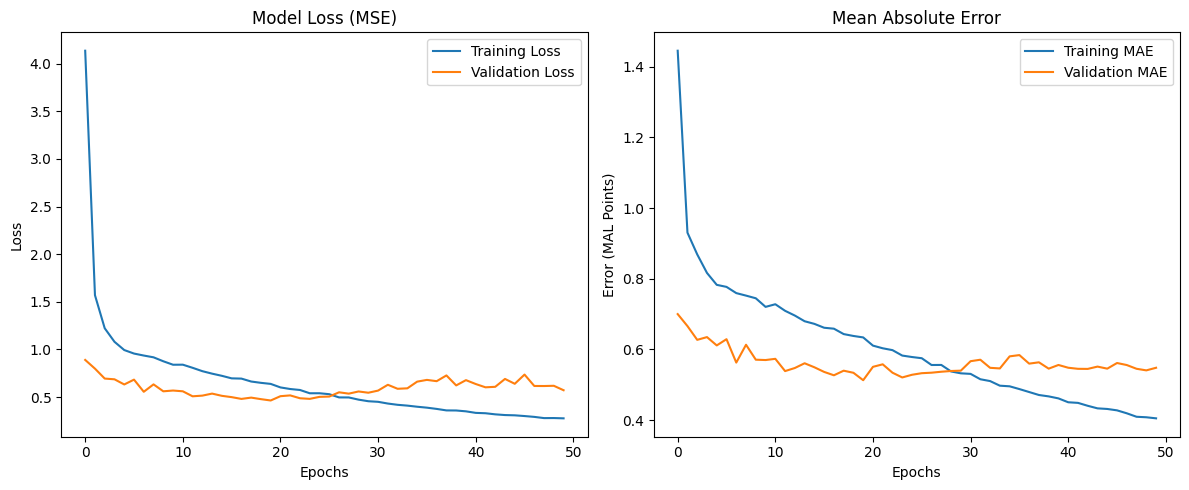

In [19]:
import matplotlib.pyplot as plt

# Create a figure with two side-by-side charts
plt.figure(figsize=(12, 5))

# Chart 1: Loss (How the error dropped)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Chart 2: MAE (How the score accuracy improved)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error (MAL Points)')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
def predict_my_anime(type_name, source, genre, studio, theme, year, episodes):
    # 1. Start with a row of 995 zeros (matches our training data shape)
    input_data = pd.DataFrame(np.zeros((1, X.shape[1])), columns=X.columns)

    # 2. Fill in the basic numbers
    input_data['Released_Year'] = year
    input_data['Episodes'] = episodes

    # 3. Turn the text inputs into "1s" in the right columns
    # We add the prefix 'Main_' because that's how we named columns in Step 3
    if f'Main_Type_{type_name}' in input_data.columns:
        input_data[f'Main_Type_{type_name}'] = 1
    if f'Main_Source_{source}' in input_data.columns:
        input_data[f'Main_Source_{source}'] = 1
    if f'Main_Genre_{genre}' in input_data.columns:
        input_data[f'Main_Genre_{genre}'] = 1
    if f'Main_Studio_{studio}' in input_data.columns:
        input_data[f'Main_Studio_{studio}'] = 1
    if f'Main_Theme_{theme}' in input_data.columns:
        input_data[f'Main_Theme_{theme}'] = 1

    # 4. SCALE the data using the SAME scaler we used for training
    input_scaled = scaler.transform(input_data)

    # 5. Predict!
    prediction = model.predict(input_scaled, verbose=0)
    return prediction[0][0]

print("Prediction function is ready!")

Prediction function is ready!


In [25]:
# @title 📺 Anime Score Predictor
# Fill these out and hit the Play button!

Type = "TV" # @param ["TV", "Movie", "OVA", "ONA", "Special"]
Source = "Manga" # @param ["Manga", "Original", "Light Novel", "Visual Novel", "Other"]
Genre = "Sci-Fi" # @param ["Action", "Adventure", "Comedy", "Drama", "Fantasy", "Sci-Fi", "Romance"]
Theme = "Gore" # @param ["Gore", "Military", "Music", "Psychological", "School", "None"]
Studio = "Toei Animation" # @param ["Madhouse", "Sunrise", "Toei Animation", "Bones", "MAPPA"]
Year = 2027 # @param {type:"slider", min:1960, max:2030, step:1}
Episodes = 24 # @param {type:"number"}

score = predict_my_anime(Type, Source, Genre, Studio, Theme, Year, Episodes)

print(f"--- PREDICTION RESULT ---")
print(f"Your custom anime is predicted to score a {score:.2f} on MyAnimeList!")

--- PREDICTION RESULT ---
Your custom anime is predicted to score a 6.81 on MyAnimeList!
